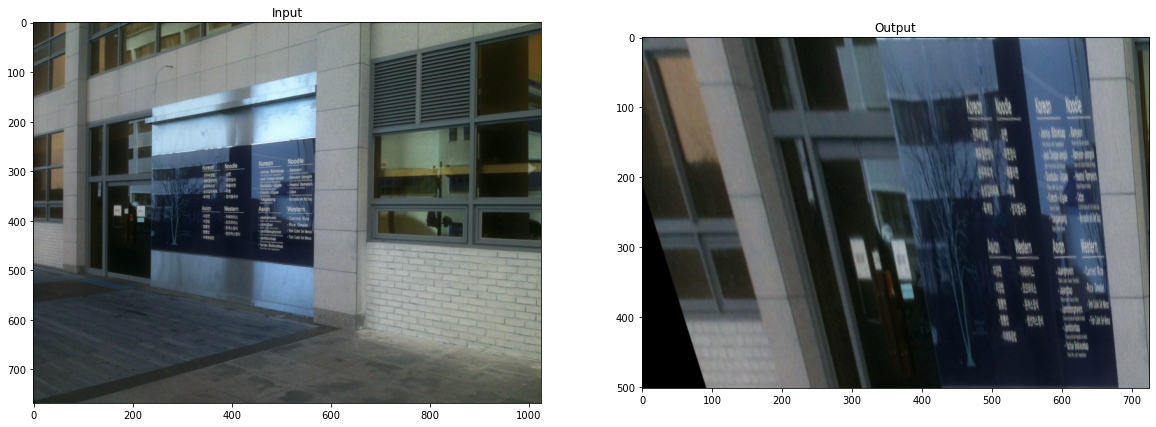

In [210]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('dsu4.jpg')
lower_reso = cv2.GaussianBlur(img, (9, 9), 0)
gray = cv2.cvtColor(lower_reso, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize = 3)

lines = cv2.HoughLines(edges, 1, np.pi/90, 130)

arr = list()

for i in range (len(lines)) :
    for rho, theta in lines[i] :
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 0*(-b))
        y1 = int(y0 + 0*(a))
        x2 = int(x0 - 700*(-b))
        y2 = int(y0 - 700*(a))
        
        cv2.line(lower_reso, (x1, y1), (x2, y2), (0, 0, 255), 2)
        arr.append([x1, y1])
        arr.append([x2, y2])

        
pts1 = np.array(arr, dtype = np.float32)
pts2 = np.float32([[0,502], [726, 502], [0,0], [726,0]])

M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(726,502))

plt.figure(figsize=(20,15))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()
